<a href="https://colab.research.google.com/github/misshp11/CV3/blob/main/lab3_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import utils

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

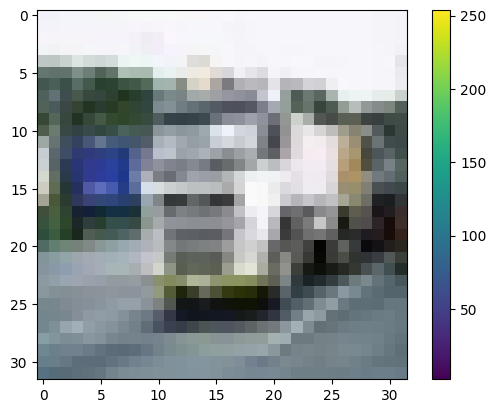

In [6]:
plt.figure()
plt.imshow(x_train[1000])
plt.colorbar()
plt.grid(False)

In [7]:
x_train = x_train/ 255
x_test = x_test/ 255

In [8]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

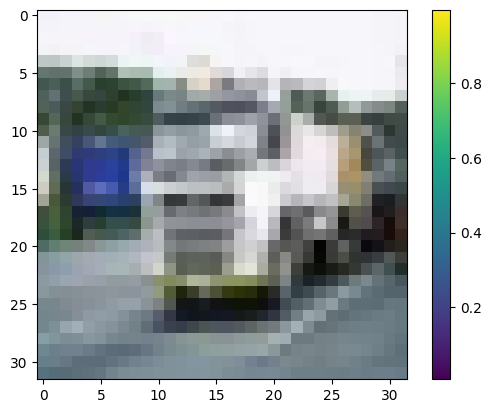

In [10]:
plt.figure()
plt.imshow(x_train[1000])
plt.colorbar()
plt.grid(False)

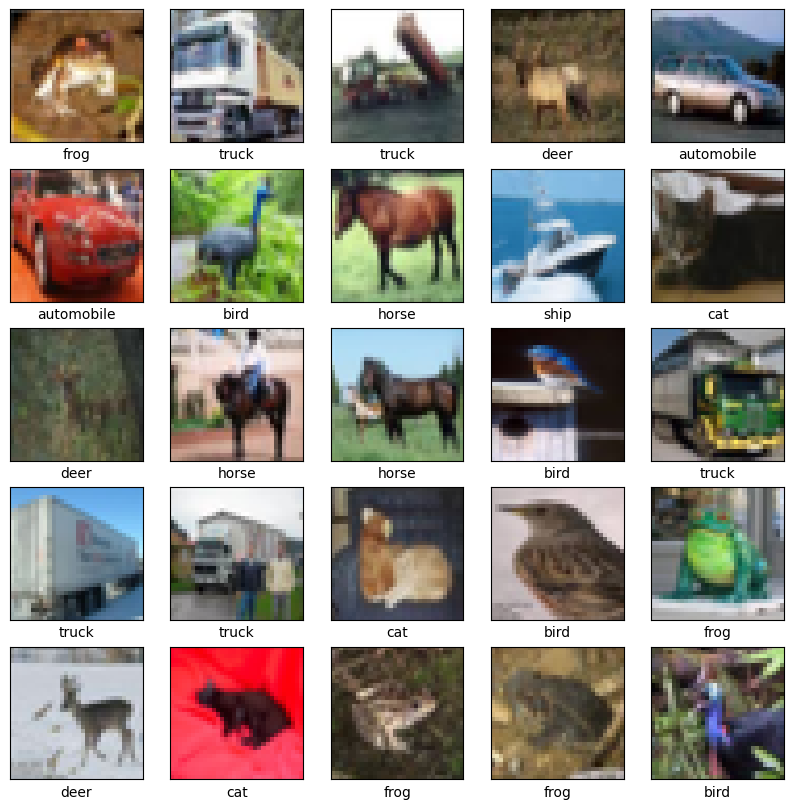

In [11]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

In [61]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
                          keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
                          keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation="softmax")
])

In [62]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), loss='MeanSquaredLogarithmicError', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 128)        

In [65]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 395s 316ms/step - loss: 0.0114 - accuracy: 0.8396 - val_loss: 0.0162 - val_accuracy: 0.7664
Epoch 2/3
1250/1250 [==============================] - 371s 296ms/step - loss: 0.0097 - accuracy: 0.8661 - val_loss: 0.0160 - val_accuracy: 0.7734
Epoch 3/3
1250/1250 [==============================] - 393s 314ms/step - loss: 0.0081 - accuracy: 0.8903 - val_loss: 0.0164 - val_accuracy: 0.7699


In [66]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 24s 75ms/step - loss: 0.0168 - accuracy: 0.7702
Test loss: 0.016804629936814308
Test accuracy: 0.7702000141143799


In [67]:
predictions = model.predict(x_test)

313/313 [==============================] - 24s 77ms/step


In [68]:
predictions[0]

array([7.7055959e-04, 1.5304959e-04, 5.8105122e-04, 9.3223542e-01,
       1.4320826e-05, 6.2876306e-02, 2.7176985e-03, 2.7668557e-05,
       6.0634699e-04, 1.7531105e-05], dtype=float32)

In [78]:
class_names[np.argmax(predictions[1000])]

'dog'

Text(0.5, 0, 'dog')

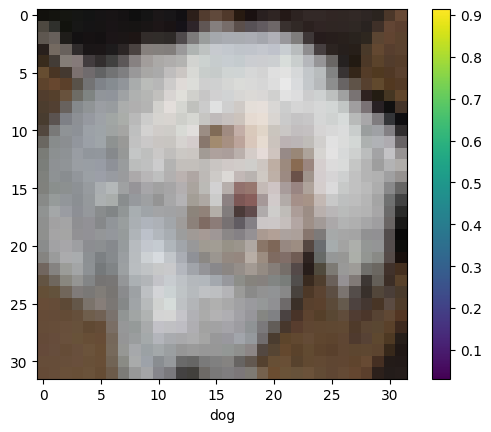

In [79]:
q = 1000
plt.figure()
plt.imshow(x_test[q])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[np.argmax(predictions[q])])